<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
X = data.data[:,:2]
y = data.target

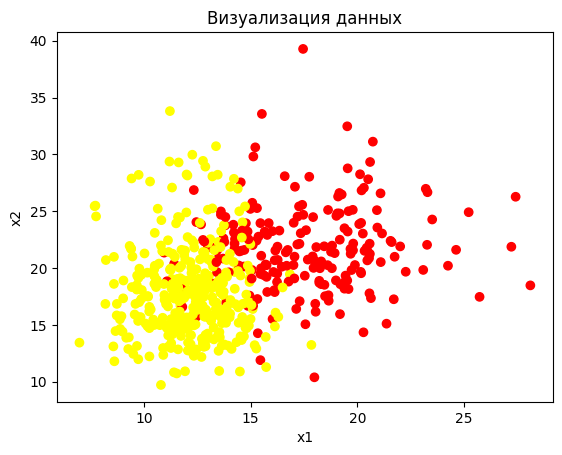

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'autumn')

plt.title("Визуализация данных")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

,count
target,
1,357
0,212


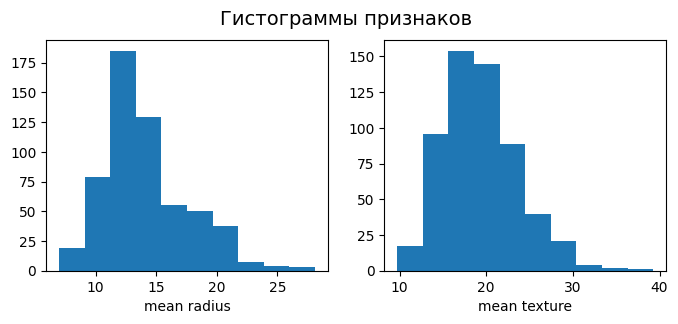

In [ ]:
plt.figure(figsize=(8, 3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian_nb = GaussianNB()

In [ ]:
gaussian_nb.fit(X, y)

GaussianNB()

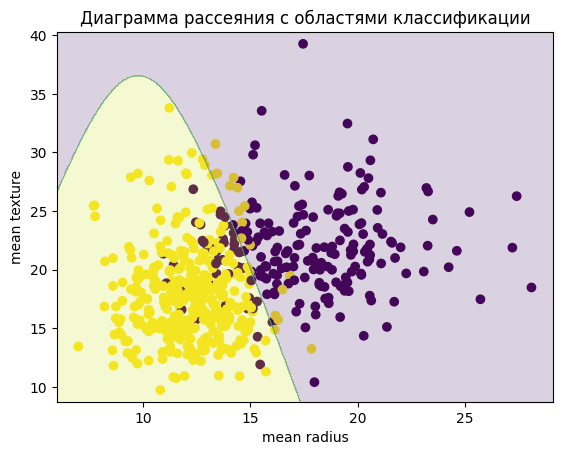

In [ ]:
X0 = np.linspace(X[:,0].min()-1,X[:,0].max()+1, X.shape[0])
X1 = np.linspace(X[:,1].min()-1,X[:,1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0,X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
Z = gaussian_nb.predict(XX).reshape(X0_grid.shape)

plt.scatter(X[:,0],X[:,1],c=y,)
plt.contourf(X0_grid, X1_grid, Z, alpha = 0.2)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [ ]:
y_pred = gaussian_nb.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinom_nb = MultinomialNB().fit(X, y)
y_pred = multinom_nb.predict(X)
print(confusion_matrix(y,y_pred))
print('Accuracy =', accuracy_score(y,y_pred))
print('F1_score =', f1_score(y,y_pred))

[[ 36 176]
 [  7 350]]
Accuracy = 0.6783831282952548
F1_score = 0.7927519818799547


In [ ]:
from sklearn.naive_bayes import ComplementNB
compl_nb = ComplementNB().fit(X, y)
y_pred = compl_nb.predict(X)
print(confusion_matrix(y,y_pred))
print('Accuracy =', accuracy_score(y,y_pred))
print('F1_score =', f1_score(y,y_pred))

[[134  78]
 [136 221]]
Accuracy = 0.6239015817223199
F1_score = 0.6737804878048781


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bern_nb = BernoulliNB().fit(X, y)
y_pred = bern_nb.predict(X)
print(confusion_matrix(y,y_pred))
print('Accuracy =', accuracy_score(y,y_pred))
print('F1_score =', f1_score(y,y_pred))

[[  0 212]
 [  0 357]]
Accuracy = 0.6274165202108963
F1_score = 0.7710583153347732


In [ ]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [ ]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


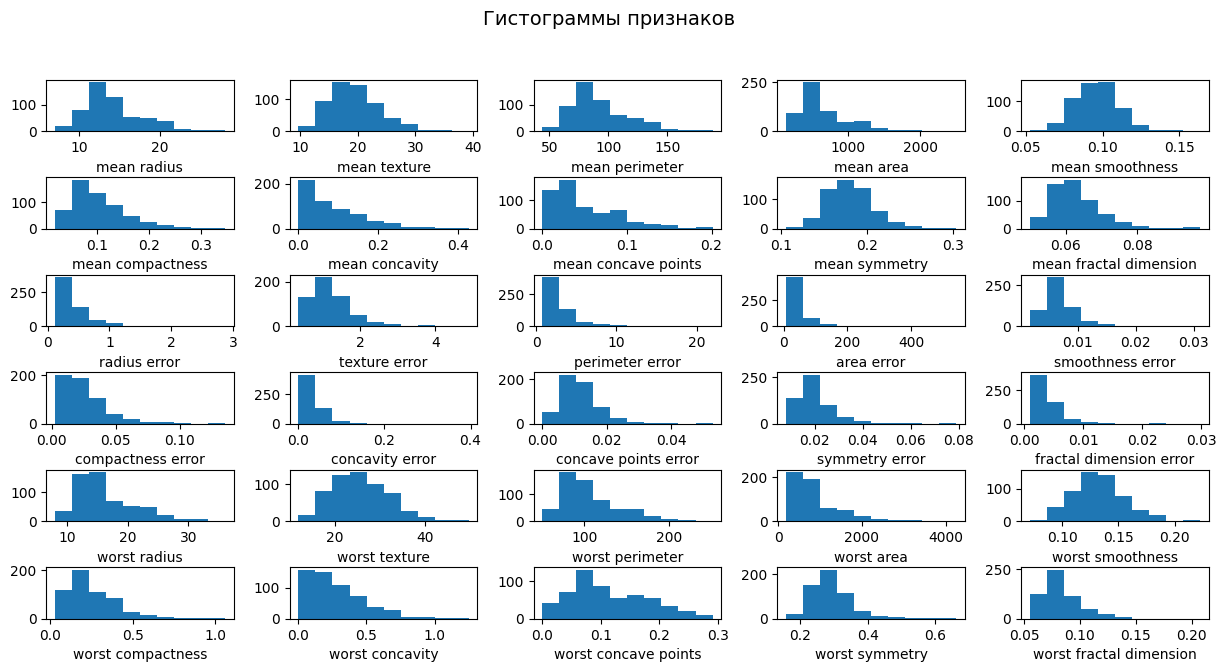

In [ ]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error',
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area',
              'worst concavity'],
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,concave points error,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678


In [ ]:
X = df
y = data.target
X.shape, y.shape

((569, 21), (569,))

In [ ]:

gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


Доп задание

In [ ]:
#Мультиномиальный (требует неотрицательные данные)
X_non_neg = X - X.min()  # сдвиг в неотрицательную область
mnb = MultinomialNB().fit(X_non_neg, y)
y_pred = mnb.predict(X_non_neg)
print("MultinomialNB Accuracy:", accuracy_score(y, y_pred))

#Бернуллиевский (для бинарных/дискретных признаков)
bnb = BernoulliNB(binarize=0.5).fit(X, y)  # бинаризация по порогу
print("BernoulliNB Accuracy:", accuracy_score(y, bnb.predict(X)))

#Комплементарный (для несбалансированных классов)
cnb = ComplementNB().fit(X, y)
print("ComplementNB Accuracy:", accuracy_score(y, cnb.predict(X)))

MultinomialNB Accuracy: 0.718804920913884
BernoulliNB Accuracy: 0.6959578207381371
ComplementNB Accuracy: 0.81195079086116


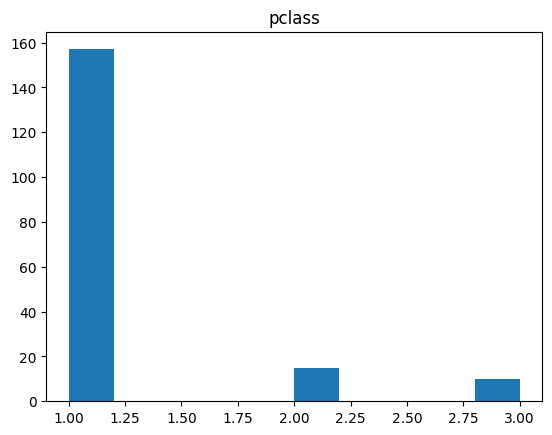

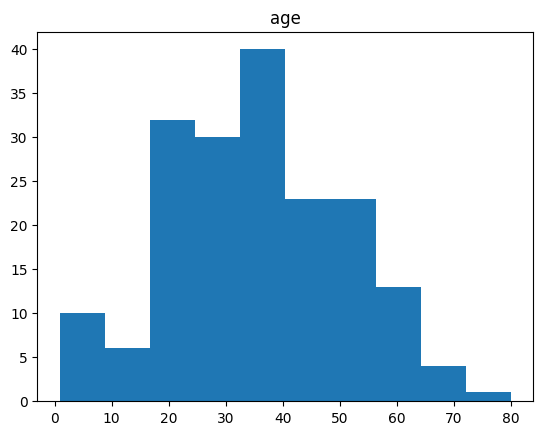

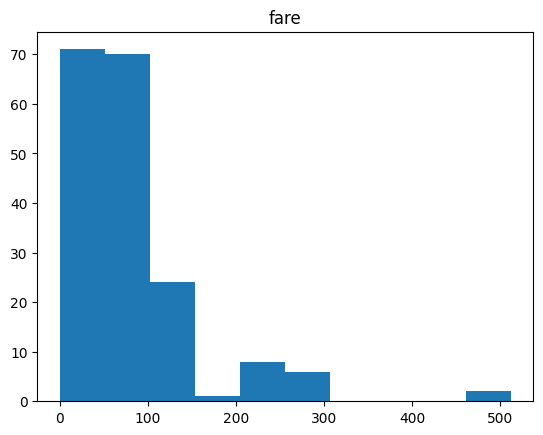

GaussianNB Accuracy: 0.7032967032967034


In [ ]:
titanic = sns.load_dataset('titanic').dropna()
X = titanic[['pclass', 'age', 'fare']]  #пример числовых признаков
y = titanic['survived']

for col in X.columns:
    plt.hist(X[col])
    plt.title(col)
    plt.show()

gnb = GaussianNB().fit(X, y)
print("GaussianNB Accuracy:", accuracy_score(y, gnb.predict(X)))
print(f1_score(y, y_pred))